In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('carprices.csv')
df.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


In [5]:
df.dtypes

Car Model        object
Mileage           int64
Sell Price($)     int64
Age(yrs)          int64
dtype: object

In [6]:
df['Car Model'].unique()

array(['BMW X5', 'Audi A5', 'Mercedez Benz C class'], dtype=object)

In [7]:
dumm=pd.get_dummies(df['Car Model'])
dumm

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [8]:
Merge=pd.concat([df,dumm],axis='columns')


In [9]:
Merge.head()

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0


In [10]:
final = Merge.drop(['Car Model'], axis='columns')
final

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,69000,18000,6,0,1,0
1,35000,34000,3,0,1,0
2,57000,26100,5,0,1,0
3,22500,40000,2,0,1,0
4,46000,31500,4,0,1,0
5,59000,29400,5,1,0,0
6,52000,32000,5,1,0,0
7,72000,19300,6,1,0,0
8,91000,12000,8,1,0,0
9,67000,22000,6,0,0,1


In [11]:
final.head()

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,69000,18000,6,0,1,0
1,35000,34000,3,0,1,0
2,57000,26100,5,0,1,0
3,22500,40000,2,0,1,0
4,46000,31500,4,0,1,0


In [12]:
import matplotlib.pyplot as plt

In [13]:
# plt.scatter(data=final,x=final['Age(yrs)'],y=final['Sell Price($)'])

In [14]:
X = final.drop('Sell Price($)', axis=1)
X

,Mileage,Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,69000,6,0,1,0
1,35000,3,0,1,0
2,57000,5,0,1,0
3,22500,2,0,1,0
4,46000,4,0,1,0
5,59000,5,1,0,0
6,52000,5,1,0,0
7,72000,6,1,0,0
8,91000,8,1,0,0
9,67000,6,0,0,1


In [15]:
y=final['Sell Price($)']

In [16]:
y.head()

0    18000
1    34000
2    26100
3    40000
4    31500
Name: Sell Price($), dtype: int64

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model=LinearRegression()

In [19]:
model.fit(X,y)

LinearRegression()

In [20]:
X.columns

Index(['Mileage', 'Age(yrs)', 'Audi A5', 'BMW X5', 'Mercedez Benz C class'], dtype='object')

In [21]:
model.predict([[45000,4,0,0,1]])

c:\Users\Khan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [22]:
model.predict([[86000,7,0,1,0]])

c:\Users\Khan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])

In [23]:
model.score(X,y)

0.9417050937281082

In [24]:
final.columns

Index(['Mileage', 'Sell Price($)', 'Age(yrs)', 'Audi A5', 'BMW X5',
       'Mercedez Benz C class'],
      dtype='object')

In [25]:
df.columns

Index(['Car Model', 'Mileage', 'Sell Price($)', 'Age(yrs)'], dtype='object')

Text(0.5, 1.0, 'Mileage vs Sell Price($)')

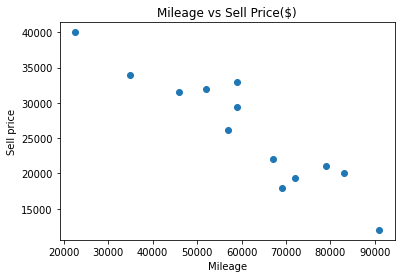

In [33]:
plt.scatter(df['Mileage'],df['Sell Price($)'])
plt.xlabel("Mileage")
plt.ylabel("Sell price")
plt.title("Mileage vs Sell Price($)")

Text(0.5, 1.0, 'Age(yrs) vs Sell Price($)')

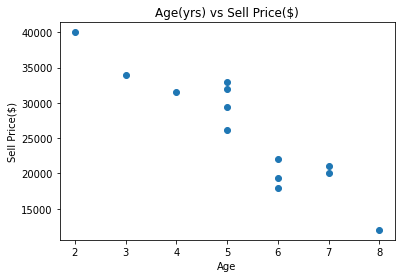

In [36]:
plt.scatter(df['Age(yrs)'],df['Sell Price($)'])
plt.xlabel("Age")
plt.ylabel("Sell Price($)")
plt.title("Age(yrs) vs Sell Price($)")

In [40]:
x1=df[['Mileage','Age(yrs)']]

In [41]:
y1= df['Sell Price($)']

In [46]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=42)

In [47]:
print("X train shape :",X_train.shape)
print("X test shape :",X_test.shape)
print("y train shape :",y_train.shape)
print("X test shape :",y_test.shape)

X train shape : (10, 2)
X test shape : (3, 2)
y train shape : (10,)
X test shape : (3,)


In [52]:
X_train

,Mileage,Age(yrs)
8,91000,8
5,59000,5
2,57000,5
1,35000,3
12,59000,5
4,46000,4
7,72000,6
10,83000,7
3,22500,2
6,52000,5


In [53]:
X_test

,Mileage,Age(yrs)
11,79000,7
9,67000,6
0,69000,6


In [54]:
y_train

8     12000
5     29400
2     26100
1     34000
12    33000
4     31500
7     19300
10    20000
3     40000
6     32000
Name: Sell Price($), dtype: int64

In [55]:
y_test

11    21000
9     22000
0     18000
Name: Sell Price($), dtype: int64

In [48]:
m=LinearRegression().fit(X_train,y_train)

In [50]:
m.score(X_train,y_train)

0.8814512928096703

In [51]:
m.predict(X_test)

array([19658.32949839, 24212.88895182, 23429.90902333])

In [49]:
m.intercept_

55880.71287204081

In [50]:
m.coef_

array([-7.22311030e-01,  2.88245033e+03, -5.22109310e+02, -4.08655896e+03,
        4.60866827e+03])

In [57]:
m.predict([[45000,4,0,0,1]])

c:\Users\Khan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([39515.18611555])